# Problem 9 - B-splines

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sin

In [76]:
def Chi(a,b,x):
    if (a <= x) and (x < b): return 1.0
    else: return 0.0

# implementation of N_jk
def N(j, k, x, t):
    if k == 1:
        return Chi(t[j], t[j+1], x)
    else:
        return (x - t[j]) / (t[j+k-1] - t[j]) * N(j, k-1, x, t) + (t[j+k] - x) / (t[j+k] - t[j+1]) * N(j+1, k-1, x, t)


## a)
The function $N_{j,k}$ is calling itself twice for every call until $k = 1$
$\implies$ complexity is $O(2^{k}) = O(2^{n-1})$

Avoiding the calculation of the same term means that every $N_{j,k}$ is called exactly once. We can derive the complexity of this algorithm by listing every possible $N_{j,k}$ in a matrix. The size of that matrix represents the complexity

$
\begin{matrix} 
N_{0, 2} & N_{0, 3} & ... & N_{0, n-1} \\
N_{1, 2} & N_{1, 3} & ... & N_{1, n-1} \\
... \\
N_{n-1, 2} & N_{n-1, 3} & ... & N_{n-1,n-3} \\
\end{matrix} \implies O((n-3)\cdot(n-3)) = O(n^2 - 6n + 9) = O(n^2)$

## b)

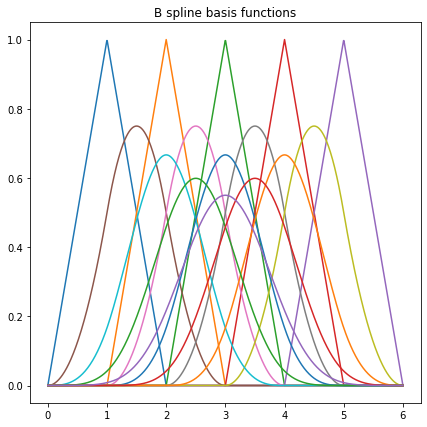

In [81]:
# Plotting the functions for knots t_j = j
# note that the functions for k==1 are not plotted because this makes the graph ugly
n = 8
x_vals = np.linspace(0,n-2, 1000)
t = [j for j in range(n)]

plt.figure(figsize=(7,7))
for k in range(2,n):
    for j in range(n-k-1):
        y_vals = [N(j, k, x, t) for x in x_vals]
        plt.plot(x_vals, y_vals)
plt.title("B spline basis functions")
plt.show()

k = 3 knots:  [0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9]


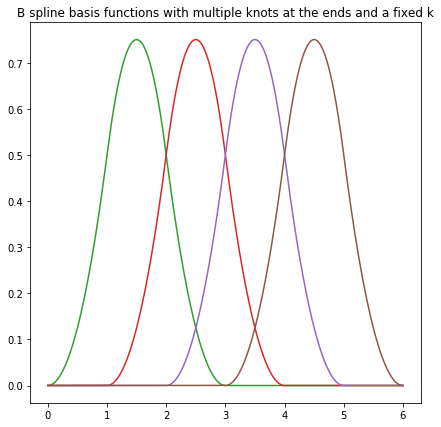

In [78]:
# using k multiple knots at both ends using a fixed k
n = 9
k = 3

plt.figure(figsize=(7,7))
plt.cla()


t = [0 for i in range(k-1)] + [j for j in range(n)] + [n for i in range(k)]
print("k =", k, "knots: ",t)
for j in range(n-k):
    y_vals = [N(j, k, x, t) for x in x_vals]
    plt.plot(x_vals, y_vals)

plt.title("B spline basis functions with multiple knots at the ends and a fixed k")
plt.show()

## C)

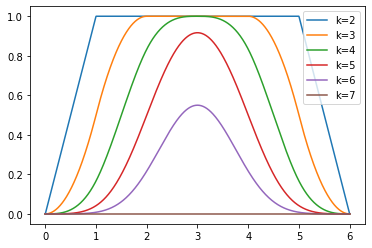

In [79]:
n = 8
x_vals = np.linspace(0,n-2, 1000)
t = [j for j in range(n)]


plt.cla()
for k in range(2,n):
    y_sum = np.zeros(len(x_vals), dtype=float)
    for j in range(n-k-1):
        y_sum += np.array([N(j, k, x, t) for x in x_vals])
    plt.plot(x_vals, y_sum, label="k="+str(k))

plt.legend()
plt.show()